In [15]:
import pandas as pd
import matplotlib.pyplot as plt
#from IPython.display import display 

CLEAN_align_website_results_path = '/home/zhenglei/DL_code/enzyme_second_prediction_project/CLEAN_align_website_results.csv'
data = pd.read_csv(CLEAN_align_website_results_path)
EC_number_modify = list(data["ours"])
uniprot_sp_enzyme_2023_data_EC = list(data["uniprot_sp_enzyme_2023_data_EC"])

In [16]:
###放松条件###
###放松严格一模一样的条件，前两位一样就可以，多标签只要有一个一样也可以###
match_score = 0
for x, y in zip(EC_number_modify, uniprot_sp_enzyme_2023_data_EC):
    if ";" not in y:
        if "-" not in y:
            if x.split(".")[0] == y.split(".")[0] and x.split(".")[1] == y.split(".")[1]:
                match_score += 1
        else:
            if y.count("-") == 3 and ";" not in x:
                if x.split(".",1)[0] == y.split(".",1)[0]:
                    match_score += 1
            elif y.count("-") == 2 and ";" not in x:
                if x.split(".")[0] == y.split(".")[0] and x.split(".")[1] == y.split(".")[1]:
                    match_score += 1
            elif y.count("-") == 1 and ";" not in x:
                if x.split(".")[0] == y.split(".")[0] and x.split(".")[1] == y.split(".")[1]:
                    match_score += 1               
    else:
        if "-" not in y:
            if x.count(";") <= y.count(";"):
                if set(list(x.split(";"))) <= set(list(y.split(";"))):
                    match_score += 1
        else:
            if x.count(";") <= y.count(";"):
                if set(list(x.split(";"))) <= set(list(y.split(";"))):
                    match_score += 1
print(match_score)
print(match_score / len(uniprot_sp_enzyme_2023_data_EC))

460
0.6875934230194319


In [17]:
###放松条件###
###放松严格一模一样的条件，前一位一样就可以，多标签只要有一个一样也可以###
match_score = 0
for x, y in zip(EC_number_modify, uniprot_sp_enzyme_2023_data_EC):
    if ";" not in y:
        if "-" not in y:
            if x.split(".")[0] == y.split(".")[0]:
                match_score += 1
        else:
            if y.count("-") == 3 and ";" not in x:
                if x.split(".",1)[0] == y.split(".",1)[0]:
                    match_score += 1
            elif y.count("-") == 2 and ";" not in x:
                if x.split(".")[0] == y.split(".")[0]:
                    match_score += 1
            elif y.count("-") == 1 and ";" not in x:
                if x.split(".")[0] == y.split(".")[0]:
                    match_score += 1               
    else:
        if "-" not in y:
            if x.count(";") <= y.count(";"):
                if set(list(x.split(";"))) <= set(list(y.split(";"))):
                    match_score += 1
        else:
            if x.count(";") <= y.count(";"):
                if set(list(x.split(";"))) <= set(list(y.split(";"))):
                    match_score += 1
print(match_score)
print(match_score / len(uniprot_sp_enzyme_2023_data_EC))

491
0.7339312406576981


In [23]:
enzyme_number = len(uniprot_sp_enzyme_2023_data_EC)
enzyme_number = [enzyme_number] * 3
label = ["CLEAN","ECRECER","SECP"]
second_EC_number = [381,350,469]
First_EC_number = [428,416,491]
second_EC_percentage = [a / b for a, b in zip(second_EC_number, enzyme_number)]
First_EC_percentage = [a / b for a, b in zip(First_EC_number, enzyme_number)]

second_EC_percentage

[0.5695067264573991, 0.523168908819133, 0.7010463378176383]

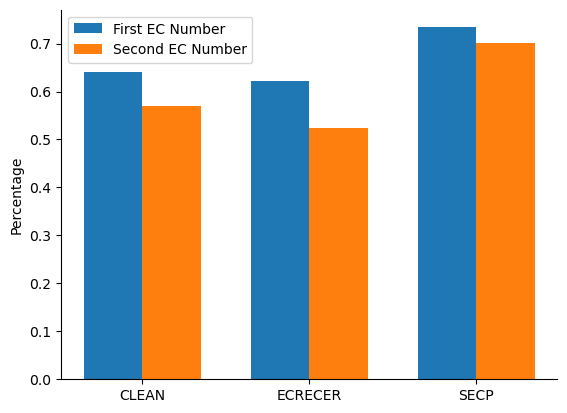

In [29]:
import matplotlib.pyplot as plt
bar_width = 0.35

# 设置柱状图的位置
index = range(len(label))
fig, ax = plt.subplots()
# 画柱状图
plt.bar(index, First_EC_percentage, width=bar_width, label='First EC Number')
plt.bar([i + bar_width for i in index], second_EC_percentage, width=bar_width, label='Second EC Number')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
# 添加标签和标题
#plt.xlabel('Labels')
plt.ylabel('Percentage')
#plt.title('First and Second EC Numbers for Each Label')
plt.xticks([i + bar_width / 2 for i in index], label)
plt.legend()

# 显示图形
plt.show()